## Definição da formulação forte

Considere $V$ como o espaço formado por funções $v:\overline{\Omega}\rightarrow\mathbb{R}$, com $v$ suficientemente regular e satisfazendo a condição $v(x)=0,\; \forall x\in\Gamma$.

\begin{align}
\left\{
\begin{aligned}
&-\alpha \Delta u(x) + \beta u(x) = f(x),\quad x\in\Omega,
\\[4pt]
&u(x) = 0, \quad x\in\Gamma,
\end{aligned}\right.
\end{align}

em que, $\Omega$ é um subconjunto do $\mathbb{R}^2$, $\Gamma$ é a fronteira de $\Omega$ e $\overline{\Omega}=\Omega\cup\Gamma$.


### Transição entre a formulação forte e fraca

Considere $V$ como o espaço formado por funções $v:\overline{\Omega}\rightarrow\mathbb{R}$, com $v$ suficientemente regular e satisfazendo a condição $v(x)=0,\; \forall x\in\Gamma$.

Dado $v \in V$, ao multiplicar a equação diferencial da formulação forte por $v$ e integrar sobre $\Omega$, obtemos


\begin{align*}
-\alpha\int_\Omega u_{x_1^{}x_1^{}}^{}(x)v(x)d\Omega
-\alpha\int_\Omega u_{x_2^{}x_2^{}}^{}(x)v(x)d\Omega
+\beta\int_\Omega u(x)v(x)d\Omega
= 
  \int_\Omega f(x)v(x)d\Omega .
\end{align*}

Com isso, dado que

\begin{align*}
- \int_\Omega u_{x_i^{}x_i^{}}^{}(x)v(x)d\Omega =
  \int_\Omega u_{x_i^{}}^{}(x)v_{x_i^{}}^{}(x)d\Omega,
\end{align*}


Dessa forma temos

\begin{align*}
\alpha\int_\Omega u_{x_1^{}}^{}(x)v_{x_1^{}}^{}(x)d\Omega
+\alpha\int_\Omega u_{x_2^{}}^{}(x)v_{x_2^{}}^{}(x)d\Omega
+\beta\int_\Omega u(x)v(x)d\Omega
= 
  \int_\Omega f(x)v(x)d\Omega.
\end{align*}

## Definição da formulação fraca

Dada uma função $f:\overline{\Omega}\rightarrow\mathbb{R}$ e constantes reais $\alpha>0$ e $\beta\geq 0$, determine $u\in V$ tal que

\begin{align*}
\kappa(u,v) = (f,v),\quad \forall v\in V.
\end{align*}

In [1]:
using LinearAlgebra
using Plots
using GaussQuadrature
using SparseArrays
using DataFrames

### Exemplos de solução exata para o problema acima:


In [2]:
function exemplo1()
	α = 1.0
	β = 1.0
	f(x₁,x₂) = (2*α*π^2+β) * sin(π*x₁) * sin(π*x₂)
	u(x₁,x₂) = sin(π*x₁) * sin(π*x₂)

	return α, β, f, u
end
     

exemplo1 (generic function with 1 method)

## Problema aproximado - Galerkin

Dada uma função $f:\overline{\Omega}\rightarrow\mathbb{R}$ e constantes reais $\alpha>0$ e $\beta\geq 0$, determine $u\in V_m$ tal que

\begin{align*}
\kappa(u,v) = (f,v),\quad \forall v\in V_m.
\end{align*}

sendo $V_m$ um subespaço vetorial de $V$ com dimensão finita $m$.

### Transição entre o problema aproximado e sua forma matriz-vetor


A formulação matricial é dada por $\displaystyle u_h(x) = \sum_{j=1}^{m} c_j\varphi_j(x)$ para $i=1,2,\dots,m$. Do sistema resultante obtemos:

\begin{align*}
\left\{
\begin{aligned}
& \kappa\big(\sum_{j=1}^mc_j\varphi_j,\varphi_1 \big) = (f,\varphi_1), 
\\
& \kappa\big(\sum_{j=1}^mc_j\varphi_j,\varphi_2 \big) = (f,\varphi_2),
\\
& \kappa\big(\sum_{j=1}^mc_j\varphi_j,\varphi_3 \big) = (f,\varphi_3),
\\
& \vdots
\\
& \kappa\big(\sum_{j=1}^mc_j\varphi_j,\varphi_m \big) = (f,\varphi_m).
\end{aligned}\right.
\end{align*}

Com isso, dado que o operador k é linear em cada componente, temos:

\begin{align*}
\left\{
\begin{aligned}
& \kappa\big(\varphi_1,\varphi_1\big)c_1 + \kappa\big(\varphi_2,\varphi_1\big)c_2 + \kappa\big(\varphi_3,\varphi_1\big)c_3 + \dots + \kappa\big(\varphi_m,\varphi_1\big)c_m = (f,\varphi_1), 
\\
& \kappa\big(\varphi_1,\varphi_2\big)c_1 + \kappa\big(\varphi_2,\varphi_2\big)c_2 + \kappa\big(\varphi_3,\varphi_2\big)c_3 + \dots + \kappa\big(\varphi_m,\varphi_2\big)c_m = (f,\varphi_2), 
\\
& \kappa\big(\varphi_1,\varphi_3\big)c_1 + \kappa\big(\varphi_2,\varphi_3\big)c_2 + \kappa\big(\varphi_3,\varphi_3\big)c_3 + \dots + \kappa\big(\varphi_m,\varphi_3\big)c_m = (f,\varphi_3), 
\\
& \vdots
\\
& \kappa\big(\varphi_1,\varphi_m\big)c_1 + \kappa\big(\varphi_2,\varphi_m\big)c_2 + \kappa\big(\varphi_3,\varphi_m\big)c_3 + \dots + \kappa\big(\varphi_m,\varphi_m\big)c_m = (f,\varphi_m).
\end{aligned}\right.
\end{align*}

Daí podemos transfomar na forma de matrizes

\begin{align*}
\begin{bmatrix}
\kappa\big(\varphi_1,\varphi_1\big)&\kappa\big(\varphi_2,\varphi_1\big)&\kappa\big(\varphi_3,\varphi_1\big)&\dots&\kappa\big(\varphi_m,\varphi_1\big)\\
\kappa\big(\varphi_1,\varphi_2\big)&\kappa\big(\varphi_2,\varphi_2\big)&\kappa\big(\varphi_3,\varphi_2\big)&\dots&\kappa\big(\varphi_m,\varphi_2\big)\\
\kappa\big(\varphi_1,\varphi_3\big)&\kappa\big(\varphi_2,\varphi_3\big)&\kappa\big(\varphi_3,\varphi_3\big)&\dots&\kappa\big(\varphi_m,\varphi_3\big)\\
\vdots&\vdots&\vdots&\ddots& \vdots  \\
\kappa\big(\varphi_1,\varphi_m\big)&\kappa\big(\varphi_2,\varphi_m\big)&\kappa\big(\varphi_3,\varphi_m\big)&\dots&\kappa\big(\varphi_m,\varphi_m\big)\\
\end{bmatrix}
\begin{bmatrix}
c_1\\
c_2\\
c_3\\
\vdots\\
c_m
\end{bmatrix}
=
\begin{bmatrix}
(f,\varphi_1)\\
(f,\varphi_2)\\
(f,\varphi_3)\\
\vdots\\
(f,\varphi_m)\\
\end{bmatrix}.
\end{align*}


## Definição da forma matriz-vetor do problema aproximado

Dada a matriz $K$ e o vetor $F$, determine o vetor $c\in\mathbb{R}^m$ tal que

\begin{align*}
Kc=F,
\end{align*}

onde

\begin{align*}
K_{i,j} = \kappa\big(\varphi_j,\varphi_i\big)
\quad\text{e}\quad
F_i = (f,\varphi_i), 
\quad\text{com}\quad
i,j\in\{1,2,\dots,m\}.
\end{align*}


In [3]:
"""
Mapeia um ponto `ξ` do intervalo padrão `[-1, 1]` para o intervalo físico
"""
function X(csi::Float64, h::Float64, p::Float64)
    return (csi + 1.0) * (h / 2.0) + p
end

function phi(csi1, csi2, a)
	if a == 1
		return (1-csi1)*(1-csi2)/4
	elseif a == 2
		return (1+csi1)*(1-csi2)/4
	elseif a == 3
		return (1+csi1)*(1+csi2)/4
	elseif a == 4
		return (1-csi1)*(1+csi2)/4
	else
		error("a deve ser 1, 2, 3 ou 4.")
	end
end

function dphi_dcsi1(csi2, a) 
	if a == 1
		return -(1-csi2)/4
	elseif a == 2
		return  (1-csi2)/4
	elseif a == 3
		return  (1+csi2)/4
	elseif a == 4
		return -(1+csi2)/4
	else
		error("a deve ser 1, 2, 3 ou 4.")
	end
end

function dphi_dcsi2(csi1, a)
	if a == 1
		return -(1-csi1)/4
	elseif a == 2
		return -(1+csi1)/4
	elseif a == 3
		return  (1+csi1)/4
	elseif a == 4
		return  (1-csi1)/4
	else
		error("a deve ser 1, 2, 3 ou 4.")
	end
end



dphi_dcsi2 (generic function with 1 method)

## Calculo das matrizes LG e EQ a partir do número de elementos


A matriz $LG$ armazena a correspondência entre a nomenclatura local e global de cada elemento finito. Assim, ela possui $n_e$ colunas, cada uma relativa a um elemento finito.

\begin{align*}
LG = 
\begin{bmatrix}
%%%%%%%%%%%%%%% Bloco 1
\begin{bmatrix}
\\
\hbox{Bloco }1\\
\\
\end{bmatrix}_{4\times N_{x_1}},
%%%%%%%%%%%%%%% Bloco 2
\begin{bmatrix}
\\
\hbox{Bloco }2\\
\\
\end{bmatrix}_{4\times N_{x_1}},
\dots,
%%%%%%%%%%%%%%% Bloco N_{x_2}
\begin{bmatrix}
\\
\hbox{Bloco }N_{x_2}\\
\\
\end{bmatrix}_{4\times N_{x_1}}
\end{bmatrix}
\end{align*}

Cada bloco da matriz $LG$ é dada por
\begin{align}
%%%%%%%%%%%%%%%%%%%%%%%% Primeiro bloco, i.e., e=1,..., N_{x_1}
\hbox{Bloco }1 = &
\begin{bmatrix}
1         & 2         & \dots &  n_{x_1}-1 \\
2         & 3         & \dots &  n_{x_1}   \\
n_{x_1}+2 & n_{x_1}+3 & \dots & 2n_{x_1}   \\
n_{x_1}+1 & n_{x_1}+2 & \dots & 2n_{x_1}-1
\end{bmatrix}_{4\times N_{x_1}},
\\[10pt]
%%%%%%%%%%%%%%%%%%%%%%%% Segundo bloco, i.e., e=N_{x_1}+1,..., 2N_{x_1}
\hbox{Bloco }2 = &
\begin{bmatrix}
 n_{x_1}+1 &  n_{x_1}+2 & \dots & 2n_{x_1}-1 \\
 n_{x_1}+2 &  n_{x_1}+3 & \dots & 2n_{x_1}   \\
2n_{x_1}+2 & 2n_{x_1}+3 & \dots & 3n_{x_1}   \\
2n_{x_1}+1 & 2n_{x_1}+2 & \dots & 3n_{x_1}-1
\end{bmatrix}_{4\times N_{x_1}},
\\[10pt]
%%%%%%%%%%%%%%%%%%%%%%%% 
\vdots
\\[10pt]
%%%%%%%%%%%%%%%%%%%%%%%% Último bloco, i.e., e=N_{x_2}-1)N_{x_1}+1,...,N_{x_2}N_{x_1}
\hbox{Bloco }N_{x_2} = &
\begin{bmatrix}
(n_{x_2}-2)n_{x_1}+1 & (n_{x_2}-2)n_{x_1}+2 & \dots & (n_{x_2}-1)n_{x_1}-1 \\
(n_{x_2}-2)n_{x_1}+2 & (n_{x_2}-2)n_{x_1}+3 & \dots & (n_{x_2}-1)n_{x_1}   \\
(n_{x_2}-1)n_{x_1}+2 & (n_{x_2}-1)n_{x_1}+3 & \dots &  n_{x_2}   n_{x_1}   \\
(n_{x_2}-1)n_{x_1}+1 & (n_{x_2}-1)n_{x_1}+2 & \dots &  n_{x_2}   n_{x_1}-1 \\
\end{bmatrix}_{4\times N_{x_1}}.
\end{align}

In [4]:
function make_partial_LG(nx1, nx2)
    return transpose(
        hcat(
            (nx2 - 2) * nx1 + 1:(nx2 - 1) * nx1 - 1, 
            (nx2 - 2) * nx1 + 2:(nx2 - 1) * nx1, 
            (nx2 - 1) * nx1 + 2:nx2 * nx1, 
            (nx2 - 1) * nx1 + 1:nx2 * nx1 - 1
        )
    )
end

function make_LG(Nx1::Int, Nx2::Int) :: Matrix{Int}
    LG = make_partial_LG(Nx1 + 1, 2)

    for i = 3:Nx2 + 1
        LG = hcat(LG, make_partial_LG(Nx1 + 1, i))
    end
    return LG
end

function make_EQ(Nx1::Int64, Nx2::Int64) :: Tuple{Int64,Vector{Int64}}
    nx1 = Nx1 + 1
    nx2 = Nx2 + 1
    m = (nx1 - 2) * (nx2 - 2)
    EQ = fill(m + 1, nx1 * nx2)
    L = []
    for j in 1:nx2-2
        for i in 0:nx1-3
            push!(L, i + (j * nx1) + 2)
        end
    end
    EQ[L] .= 1:m
    
    return m, EQ
end

make_EQ (generic function with 1 method)

### Cálculo da matriz local $K^e$ - via quadratura gaussia

\begin{align}
K_{a,b}^e 
=&
 \alpha\int_{\Omega^e} 
\frac{\partial\varphi_b^e}{\partial x_1}(x)
\frac{\partial\varphi_a^e}{\partial x_1}(x)
d\Omega
+\alpha\int_{\Omega^e} 
\frac{\partial\varphi_b^e}{\partial x_2}(x)
\frac{\partial\varphi_a^e}{\partial x_2}(x)
d\Omega
+\beta \int_{\Omega^e} 
\varphi_b^e(x)
\varphi_a^e(x)
d\Omega

\\[20pt]
= &
\alpha\int_{-1}^1\int_{-1}^1
\frac{\partial\varphi_b^e}{\partial x_1}\big(x(\xi)\big)
\frac{\partial\varphi_a^e}{\partial x_1}\big(x(\xi)\big)
\left|\frac{\partial(x_1,x_2)}{\partial(\xi_1,\xi_2)}\right| d\xi_1\,d\xi_2
\\[10pt]
& +
\alpha\int_{-1}^1\int_{-1}^1
\frac{\partial\varphi_b^e}{\partial x_2}\big(x(\xi)\big)
\frac{\partial\varphi_a^e}{\partial x_2}\big(x(\xi)\big)
\left|\frac{\partial(x_1,x_2)}{\partial(\xi_1,\xi_2)}\right| d\xi_1\,d\xi_2
\\[10pt]
& +
\beta \int_{-1}^1\int_{-1}^1
\varphi_b^e\big(x(\xi)\big)
\varphi_a^e\big(x(\xi)\big)
\left|\frac{\partial(x_1,x_2)}{\partial(\xi_1,\xi_2)}\right| d\xi_1\,d\xi_2

\\[20pt]
=&
\alpha\int_{-1}^1\int_{-1}^1
\frac{\partial\phi_b}{\partial \xi_1}(\xi)\frac{2}{h_1}
\frac{\partial\phi_a}{\partial \xi_1}(\xi)\frac{2}{h_1}
\frac{h_1h_2}{4} d\xi_1\,d\xi_2
\\[10pt]
& +
\alpha\int_{-1}^1\int_{-1}^1
\frac{\partial\phi_b}{\partial \xi_2}(\xi)\frac{2}{h_2}
\frac{\partial\phi_a}{\partial \xi_2}(\xi)\frac{2}{h_2}
\frac{h_1h_2}{4} d\xi_1\,d\xi_2
\\[10pt]
& +
\beta \int_{-1}^1\int_{-1}^1
\phi_b(\xi)
\phi_a(\xi)
\frac{h_1h_2}{4} d\xi_1\,d\xi_2

\\[20pt]
=&
\alpha
\frac{h_2}{h_1}
\int_{-1}^1\int_{-1}^1
\frac{\partial\phi_b}{\partial \xi_1}(\xi)
\frac{\partial\phi_a}{\partial \xi_1}(\xi)
d\xi_1\,d\xi_2
\\[10pt]
& +
\alpha
\frac{h_1}{h_2}
\int_{-1}^1\int_{-1}^1
\frac{\partial\phi_b}{\partial \xi_2}(\xi)
\frac{\partial\phi_a}{\partial \xi_2}(\xi)
d\xi_1\,d\xi_2
\\[10pt]
& +
\beta
\frac{h_1h_2}{4} 
\int_{-1}^1\int_{-1}^1
\phi_b(\xi)
\phi_a(\xi)
d\xi_1\,d\xi_2.
\end{align}

In [5]:

function make_Ke(alfa::Float64, beta::Float64, h1::Float64, h2::Float64, P::Vector{Float64}, W::Vector{Float64})
    K = zeros(4, 4)
    c1 = alfa * (h2 / h1)
    c2 = alfa * (h1 / h2)
    c3 = beta * (h1 * h2 / 4)

    for a in 1:4
        for b in 1:4
            for gi in 1:length(P)
                xi1 = P[gi]
                for gj in 1:length(P)
                    xi2 = P[gj]
                    K[a, b] += W[gi] * W[gj] * (
                        c1 * dphi_dcsi1(xi2, b) * dphi_dcsi1(xi2, a) + 
                        c2 * dphi_dcsi2(xi1, b) * dphi_dcsi2(xi1, a) + 
                        c3 * phi(xi1, xi2, b) * phi(xi1, xi2, a)
                    )
                end
            end
        end
    end
    return K
end



make_Ke (generic function with 1 method)

### Montagem da matriz global K a partir da matriz local $K^e$

In [6]:
function make_K(alpha::Float64, beta::Float64, Nx1::Int64, Nx2::Int64, m::Int64, EQoLG::Matrix{Int64})
    h1 = 1 / Nx1
    h2 = 1 / Nx2
    ne = Nx1 * Nx2
    P, W = legendre(2)

    ke = make_Ke(alpha, beta, h1, h2, P, W)
    K = spzeros(m+1, m+1)
    for e = 1:ne
        for b = 1:4
            j = EQoLG[b,e]
            for a = 1:4
                i = EQoLG[a,e]
                K[i,j] += ke[a,b]
            end
        end
    end
   
    return K[1:m, 1:m]
end

make_K (generic function with 1 method)

### Cálculo do vetor local $F^e$ - via quadratura gaussiana

\begin{align}
F_a^e 
=& \int_{\Omega^e}f(x)\varphi_a^e(x)d\Omega
\\[5pt]
=& \int_{-1}^1\int_{-1}^1 f\big(x(\xi)\big)\varphi_a^e\big(x(\xi)\big)
\left|\frac{\partial(x_1,x_2)}{\partial(\xi_1,\xi_2)}\right| d\xi_1\,d\xi_2
\\[5pt]
=& \frac{h_1h_2}{4}\int_{-1}^1\int_{-1}^1 f\big(x(\xi)\big) \phi_a(\xi) d\xi_1\,d\xi_2.
\end{align}

In [7]:
function make_Fe(f::Function,  h1::Float64, h2::Float64, xi1::Float64, xi2::Float64, P::Vector{Float64}, W::Vector{Float64})
    Fe = zeros(4)
    J = h1*h2/4
    for a in 1:4
        for gi in 1:length(P)
            for gj in 1:length(P)
                x1 = X(P[gi], h1, xi1)
                x2 = X(P[gj], h2, xi2)
                Fe[a] += W[gi] * W[gj] * f(x1, x2) * phi(P[gi], P[gj], a) * J
            end
        end
    end
    
    return Fe
end

make_Fe (generic function with 1 method)

### Montagem do vetor global F a partir do vetor local $F^e$


In [8]:
function make_F(f::Function, Nx1::Int64, Nx2::Int64, m::Int, EQoLG::Matrix{Int}, npg::Int=5)
    h1 = 1.0 / Nx1
    h2 = 1.0 / Nx2
    ne = Nx1 * Nx2
    F = zeros(m + 1)
    P, W = legendre(npg)
    
    for j in 1:Nx2
        for i in 1:Nx1
            e = (j - 1) * Nx1 + i
            p1 = (i - 1) * h1
            p2 = (j - 1) * h2
            Fe = make_Fe(f, h1, h2, p1, p2, P, W)
        
            for a = 1:4
                F[EQoLG[a, e]] += Fe[a]
            end
        end
    end
    
    return F[1:m]
end

make_F (generic function with 2 methods)

### Cálculo do erro na norma L2 utilizando quadratura gaussiana

\begin{align}
\|u-u_h\|^2
= &
\int_\Omega |u(x)-u_h(x)|^2dx
\\[5pt]
=&
\sum_{e=1}^{n_e} \int_{\Omega^e} |u(x)-u_h(x)|^2dx
\\[5pt]
=&
\sum_{e=1}^{n_e} \int_{-1}^{1} \int_{-1}^{1}
\big|u\big(x(\xi)\big)
-\sum_{a=1}^{4}\bar{c}_{EQoLG(a,e)}\phi_a(\xi)\big|^2|J|d\xi
\\[5pt]
=&
\frac{h_1h_2}{4}\sum_{e=1}^{n_e} \int_{-1}^{1} \int_{-1}^{1}
\big|u\big(x(\xi)\big)
-\sum_{a=1}^{4}\bar{c}_{EQoLG(a,e)}\phi_a(\xi)\big|^2d\xi.
\end{align}

In [9]:
function L2_error(u::Function, c::Vector{Float64}, Nx1::Int64, Nx2::Int64, EQoLG::Matrix{Int}, npg::Int)
    h1 = 1 / Nx1
    h2 = 1 / Nx2
    J = h1 * h2 / 4

    error = 0.0         
    P, W = legendre(npg) 

    for j = 1:Nx2
        for i = 1:Nx1
            e = (j - 1) * Nx1 + i
            p1 = (i - 1) * h1
            p2 = (j - 1) * h2

            c1e = c[EQoLG[1,e]]
            c2e = c[EQoLG[2,e]]
            c3e = c[EQoLG[3,e]]
            c4e = c[EQoLG[4,e]]

            for b = 1:npg
                x2 = X(P[b], h2, p2)
                for a = 1:npg
                    x1 = X(P[a], h1, p1) 

                    error += W[a] * W[b] * (u(x1, x2) - 
                        c1e * phi(P[a], P[b], 1) -
                        c2e * phi(P[a], P[b], 2) -
                        c3e * phi(P[a], P[b], 3) -
                        c4e * phi(P[a], P[b], 4))^2
                end
            end
        end
    
    end

    return sqrt(error * J)
end

L2_error (generic function with 1 method)

### Comparando a solução aproximada com a solução exata


In [10]:
function plot_approximation(c::Vector{Float64}, Nx1::Int64, Nx2::Int64, EQoLG::Matrix{Int64})
    # Comprimentos da base (h1) e altura (h2) de cada elemento retangular Ωᵉ
    h1 = 1 / Nx1
    h2 = 1 / Nx2

    # Define uma discretização do intervalo de referência [-1, 1] nos eixos ξ1 e ξ2
    P = collect(-1:0.1:1)

    # Inicializa um objeto de gráfico que acumulará as superfícies
    plt = plot(seriestype = :surface, title="Solução Aproximada")
	
    # Loop nos elementos da malha (percorrendo cada subdivisão ao longo de x2 e x1)
    for j = 1:Nx2
        # Define a segunda coordenada do ponto inferior esquerdo do retângulo `Ωᵉ`.
        p2 = (j - 1) * h2
        # Calcula os valores correspondentes no eixo x2 para os pontos P no eixo ξ2
        x2 = X.(P, h2, p2)

        for i = 1:Nx1
            # Primeira coordenada do ponto inferior esquerdo do retângulo `Ωᵉ`.
            p1 = (i - 1) * h1
            # Valores correspondentes no eixo x1 para os pontos P no eixo ξ1
            x1 = X.(P, h1, p1)

            # Determina a numeração do elemento finito atual (`e`) na malha
            e = (j - 1) * Nx1 + i

            # Obtém os coeficientes `c` da solução aproximada no elemento `e`
            c1e = c[EQoLG[1, e]]
            c2e = c[EQoLG[2, e]]
            c3e = c[EQoLG[3, e]]
            c4e = c[EQoLG[4, e]]

            # Gera o gráfico da solução aproximada sobre o elemento `e`
            plot!(plt, x1, x2, (x1, x2) -> 
				  c1e*phi(x1,x2,1) 
				+ c2e*phi(x1,x2,2) 
				+ c3e*phi(x1, x2, 3) 
				+ c4e * phi(x1, x2, 4),
                seriestype = :surface, colorbar=false, color=:viridis,
				xticks=[0, 0.5, 1],yticks=[0, 0.5, 1],zticks=[0, 1],
				zlims=(0,1)
            )
        end
    end

	return plt
end

plot_approximation (generic function with 1 method)

In [11]:
function show_solution()
    alpha, beta, f, u = exemplo1()
    npg = 5
    Nx1 = 4
    Nx2 = 4
    
    LG = make_LG(Nx1, Nx2)
    m, EQ = make_EQ(Nx1, Nx2)
    EQoLG = EQ[LG]
    
    display("EQoLG = "); display(EQoLG)
    
    
    # Constrói a matriz K e o vetor F
    K = make_K(alpha, beta, Nx1, Nx2, m, EQoLG)
    F = make_F(f, Nx1, Nx2, m, EQoLG, npg)
    
    # Exibe a matriz K (sistema linear) e o vetor F (vetor força)
    display("Matriz K:")
    display(K)
    display("Vetor F:")
    display(F)
    
    h1 = 1.0 / Nx1
    h2 = 1.0 / Nx2

    # Resolve o sistema linear K * c = F para obter os coeficientes solução aproximada u_h(x)
    c = K \ F
    c_exact = [u(x1, x2) for x2 in h2:h2:1-h2, x1 in h1:h1:1-h1]

    println("Solução aproximada:")
    println(c)
    println("Solução exata:")
    println(c_exact)

    # Discretização no eixo x1
	X = 0:0.01:1
	
	plt = plot_approximation([c;0], Nx1, Nx2, EQoLG)
	plot(
	plot(X,X,(x1, x2) -> u(x1, x2),
		title="Solução Exata",
		seriestype = :surface, colorbar=false, color=:viridis, 
		xticks=[0, 0.5, 1],yticks=[0, 0.5, 1],zticks=[0, 1]),
	plt,
	layout=(1, 2))
end

show_solution (generic function with 1 method)

### Estudo de convergência do erro.

In [12]:
function calcule_error()
    alpha, beta, f, u = exemplo1()

    npg = 5
    vec_Nx1 = [2^i for i in 2:8]
    vec_Nx2 = vec_Nx1

    hs = sqrt.( (1 ./ vec_Nx1).^2 + (1 ./ vec_Nx2).^2 )
    errors = zeros(length(vec_Nx1))

    for i = 1:length(vec_Nx1)
        Nx1 = vec_Nx1[i]
        Nx2 = vec_Nx2[i]

        LG = make_LG(Nx1, Nx2)
        m, EQ = make_EQ(Nx1, Nx2)
        EQoLG = EQ[LG]

        K = make_K(alpha, beta, Nx1, Nx2, m, EQoLG)
        F = make_F(f, Nx1, Nx2, m, EQoLG, npg)

        c = K \ F

        errors[i] = L2_error(u, [c; 0], Nx1, Nx2, EQoLG, npg)
    end

    return hs, errors
end

calcule_error (generic function with 1 method)

In [13]:
function plot_error()
    @time begin
		hs, errors = calcule_error()
	end

    plt = plot(
        hs, errors, lw=3, linestyle=:solid, markershape=:circle,
        label="Erro", title="Estudo do erro",
        xscale=:log10, yscale=:log10, legend=:topleft
    )

    plot!(plt, hs, hs.^2, lw=3, linestyle=:solid, label="h²")

    xlabel!("h")
    ylabel!("Erro")

    display("Tabela com os valores de h e erro:")
    display(DataFrame(h=hs, erro=errors))

	return plt
end

plot_error (generic function with 1 method)

"EQoLG = "

4×16 Matrix{Int64}:
 10  10  10  10  10  1  2   3  10  4  5   6  10   7   8   9
 10  10  10  10   1  2  3  10   4  5  6  10   7   8   9  10
  1   2   3  10   4  5  6  10   7  8  9  10  10  10  10  10
 10   1   2   3  10  4  5   6  10  7  8   9  10  10  10  10

"Matriz K:"

9×9 SparseMatrixCSC{Float64, Int64} with 49 stored entries:
  2.69444   -0.326389    ⋅        …    ⋅          ⋅          ⋅ 
 -0.326389   2.69444   -0.326389       ⋅          ⋅          ⋅ 
   ⋅        -0.326389   2.69444        ⋅          ⋅          ⋅ 
 -0.326389  -0.331597    ⋅           -0.326389  -0.331597    ⋅ 
 -0.331597  -0.326389  -0.331597     -0.331597  -0.326389  -0.331597
   ⋅        -0.331597  -0.326389  …    ⋅        -0.331597  -0.326389
   ⋅          ⋅          ⋅            2.69444   -0.326389    ⋅ 
   ⋅          ⋅          ⋅           -0.326389   2.69444   -0.326389
   ⋅          ⋅          ⋅             ⋅        -0.326389   2.69444

"Vetor F:"

9-element Vector{Float64}:
 0.584468763135797
 0.8265636516100721
 0.5844687631357971
 0.8265636516100721
 1.168937526271594
 0.8265636516100723
 0.5844687631357971
 0.8265636516100722
 0.5844687631357972

Solução aproximada:
[0.527459460647701, 0.7459403228499764, 0.527459460647701, 0.7459403228499765, 1.054918921295402, 0.7459403228499764, 0.527459460647701, 0.7459403228499767, 0.527459460647701]
Solução exata:
[0.4999999999999999 0.7071067811865475 0.5; 0.7071067811865475 1.0 0.7071067811865476; 0.5 0.7071067811865476 0.5000000000000001]


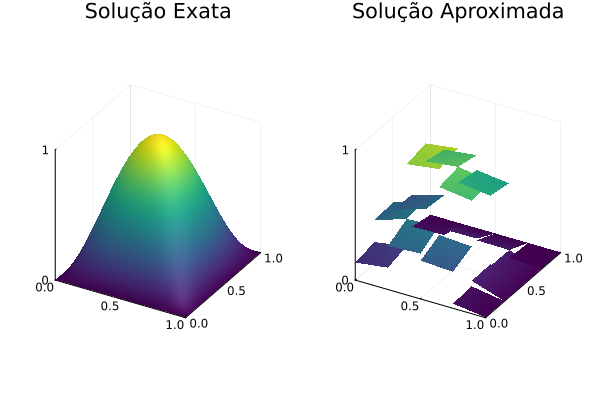

In [14]:
show_solution()

"Tabela com os valores de h e erro:"

Row,h,erro
,Float64,Float64
1,0.353553,0.0294644
2,0.176777,0.00734814
3,0.0883883,0.00183603
4,0.0441942,0.000458945
5,0.0220971,0.000114733
6,0.0110485,2.86829e-5
7,0.00552427,7.17071e-6


  3.261801 seconds (613.78 k allocations: 475.726 MiB, 2.48% gc time, 0.09% compilation time)


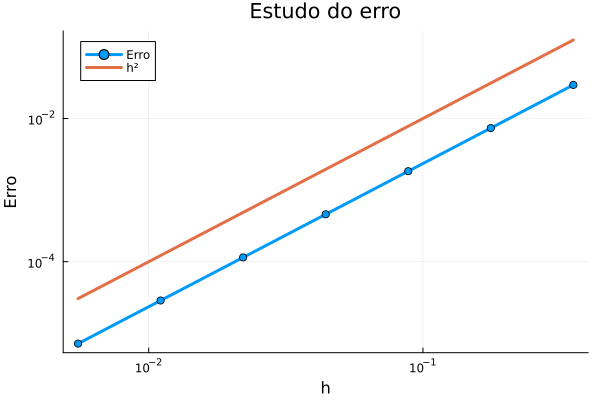

In [15]:
plot_error()